# <center> An Introduction to Deep Learning With Python <center/>

### [4.1] Classifying movie reviews a binary classification example
Prof. Yuzo Iano

pgs: 105 - 110

#### Loading the IMDB dataset

In [1]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#### Preparing the data
Encoding the Integer sequences Into a binary matrix

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Setting aside a validation set

In [5]:
x_val = x_train[: 10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Building your model
Original model

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### Training your model

In [8]:
from keras import optimizers

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 364us/step - loss: 0.1637 - acc: 0.9431 - val_loss: 0.3212 - val_acc: 0.8728
Epoch 2/20
15000/15000 [==============================] - 5s 365us/step - loss: 0.1277 - acc: 0.9588 - val_loss: 0.2897 - val_acc: 0.8887
Epoch 3/20
15000/15000 [==============================] - 5s 340us/step - loss: 0.1011 - acc: 0.9699 - val_loss: 0.3131 - val_acc: 0.8835
Epoch 4/20
15000/15000 [==============================] - 5s 326us/step - loss: 0.0850 - acc: 0.9743 - val_loss: 0.3744 - val_acc: 0.8720
Epoch 5/20
15000/15000 [==============================] - 5s 329us/step - loss: 0.0707 - acc: 0.9791 - val_loss: 0.3604 - val_acc: 0.8767
Epoch 6/20
15000/15000 [==============================] - 5s 321us/step - loss: 0.0585 - acc: 0.9844 - val_loss: 0.3745 - val_acc: 0.8818
Epoch 7/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.0503 - acc: 0.9869 - val_loss: 0.4004 - 

In [9]:
original_loss = history.history['val_loss']
original_loss_training = history.history['loss']

#### Version of the model with lower capacity

In [10]:
low = Sequential()
low.add(Dense(4, activation='relu', input_shape=(10000,)))
low.add(Dense(4, activation='relu'))
low.add(Dense(1, activation='sigmoid'))
low.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
low.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

historylow = low.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 346us/step - loss: 0.6187 - acc: 0.6503 - val_loss: 0.5607 - val_acc: 0.7740
Epoch 2/20
15000/15000 [==============================] - 5s 302us/step - loss: 0.5202 - acc: 0.8149 - val_loss: 0.5100 - val_acc: 0.8055
Epoch 3/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.4654 - acc: 0.8729 - val_loss: 0.4869 - val_acc: 0.8097
Epoch 4/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.4243 - acc: 0.9039 - val_loss: 0.4568 - val_acc: 0.8518
Epoch 5/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.3899 - acc: 0.9233 - val_loss: 0.4342 - val_acc: 0.8748
Epoch 6/20
15000/15000 [==============================] - 5s 305us/step - loss: 0.3599 - acc: 0.9373 - val_loss: 0.4189 - val_acc: 0.8790
Epoch 7/20
15000/15000 [==============================] - 5s 304us/step - loss: 0.3331 - acc: 0.9484 - val_loss: 0.4307 - 

In [12]:
low_loss = historylow.history['val_loss']

#### Plotting the validation loss

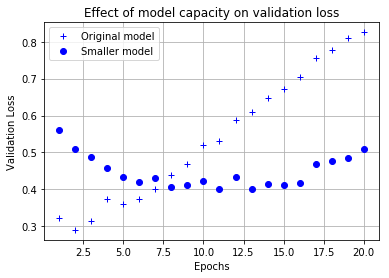

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(original_loss) + 1)

plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, low_loss, 'bo', label='Smaller model')
plt.title('Effect of model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### Version of the model with higher capacity

In [15]:
high = Sequential()
high.add(Dense(512, activation='relu', input_shape=(10000,)))
high.add(Dense(512, activation='relu'))
high.add(Dense(1, activation='sigmoid'))
high.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
high.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

historyhigh = high.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 654us/step - loss: 0.5303 - acc: 0.7758 - val_loss: 0.6182 - val_acc: 0.7285
Epoch 2/20
15000/15000 [==============================] - 9s 588us/step - loss: 0.2540 - acc: 0.8991 - val_loss: 0.3049 - val_acc: 0.8780
Epoch 3/20
15000/15000 [==============================] - 9s 590us/step - loss: 0.1562 - acc: 0.9409 - val_loss: 0.3292 - val_acc: 0.8609
Epoch 4/20
15000/15000 [==============================] - 9s 583us/step - loss: 0.0834 - acc: 0.9723 - val_loss: 0.4004 - val_acc: 0.8810
Epoch 5/20
15000/15000 [==============================] - 9s 570us/step - loss: 0.1209 - acc: 0.9769 - val_loss: 0.3261 - val_acc: 0.8825
Epoch 6/20
15000/15000 [==============================] - 9s 570us/step - loss: 0.0059 - acc: 0.9998 - val_loss: 0.4956 - val_acc: 0.8839
Epoch 7/20
15000/15000 [==============================] - 9s 573us/step - loss: 7.1435e-04 - acc: 1.0000 - val_loss: 0.57

In [17]:
high_loss = historyhigh.history['val_loss']
high_loss_training = historyhigh.history['loss']

#### Plotting the validation loss

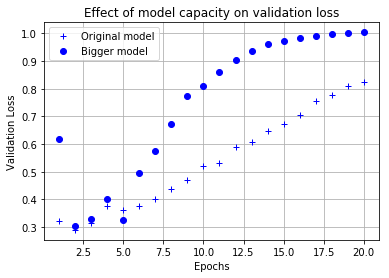

In [18]:
plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, high_loss, 'bo', label='Bigger model')
plt.title('Effect of model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### Plotting the training loss

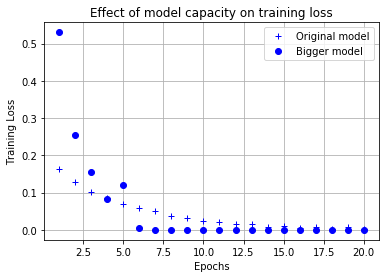

In [19]:
plt.plot(epochs, original_loss_training, 'b+', label='Original model')
plt.plot(epochs, high_loss_training, 'bo', label='Bigger model')
plt.title('Effect of model capacity on training loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.show()

#### Adding L2 weight regularization to the model

In [20]:
from keras import regularizers

modell2 = Sequential()
modell2.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
modell2.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
modell2.add(Dense(1, activation='sigmoid'))
modell2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [21]:
modell2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

historyl2 = modell2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 385us/step - loss: 0.5298 - acc: 0.7949 - val_loss: 0.4098 - val_acc: 0.8655
Epoch 2/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.3371 - acc: 0.9017 - val_loss: 0.3439 - val_acc: 0.8892
Epoch 3/20
15000/15000 [==============================] - 5s 321us/step - loss: 0.2741 - acc: 0.9241 - val_loss: 0.3400 - val_acc: 0.8853
Epoch 4/20
15000/15000 [==============================] - 5s 322us/step - loss: 0.2403 - acc: 0.9345 - val_loss: 0.3273 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 5s 328us/step - loss: 0.2233 - acc: 0.9437 - val_loss: 0.3339 - val_acc: 0.8877
Epoch 6/20
15000/15000 [==============================] - 5s 341us/step - loss: 0.2056 - acc: 0.9515 - val_loss: 0.3485 - val_acc: 0.8849
Epoch 7/20
15000/15000 [==============================] - 5s 330us/step - loss: 0.1961 - acc: 0.9531 - val_loss: 0.3487 - 

In [22]:
l2_loss = historyl2.history['val_loss']

#### Plotting the validation loss

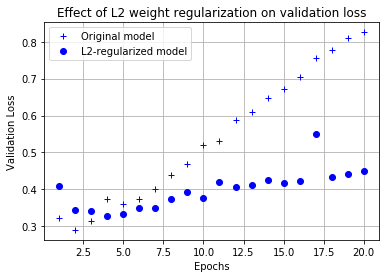

In [23]:
plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, l2_loss, 'bo', label='L2-regularized model')
plt.title('Effect of L2 weight regularization on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### Adding dropout to the IMDB network

In [24]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history_dropout = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 353us/step - loss: 0.6414 - acc: 0.6269 - val_loss: 0.5487 - val_acc: 0.7669
Epoch 2/20
15000/15000 [==============================] - 5s 345us/step - loss: 0.5377 - acc: 0.7530 - val_loss: 0.4570 - val_acc: 0.8666
Epoch 3/20
15000/15000 [==============================] - 5s 331us/step - loss: 0.4633 - acc: 0.8154 - val_loss: 0.3865 - val_acc: 0.8800
Epoch 4/20
15000/15000 [==============================] - 5s 333us/step - loss: 0.4013 - acc: 0.8533 - val_loss: 0.3465 - val_acc: 0.8798
Epoch 5/20
15000/15000 [==============================] - 6s 412us/step - loss: 0.3548 - acc: 0.8838 - val_loss: 0.3159 - val_acc: 0.8841
Epoch 6/20
15000/15000 [==============================] - 6s 377us/step - loss: 0.3134 - acc: 0.8993 - val_loss: 0.3066 - val_acc: 0.8764
Epoch 7/20
15000/15000 [==============================] - 5s 346us/step - loss: 0.2806 - acc: 0.9156 - val_loss: 0.2982 - 

In [26]:
dropout_loss = history_dropout.history['val_loss']

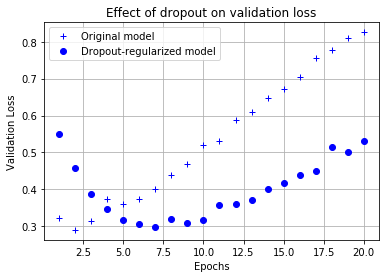

In [27]:
plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_loss, 'bo', label='Dropout-regularized model')
plt.title('Effect of dropout on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

###### Pablo Minango
* pablodavid218@gmail.com 